# Lab: Describing Your Data

## Descriptive statistics
Let's begin by opening the Nominate data for the 116th Congress ([Lewis et al. 2020](https://voteview.com/)). The goal of today's lab is to learn how to describe our data through calculations of central tendancy and dispersion, and how to create simple tables to present such statistics for your readers. Along the way, we will learn how to run a command while suppressing output, how to use the ***display*** command to call up stored information and print it with text, briefly experience using _local macros_ and _matrices_ in Stata, and how to write tables to an Excel file using ***putexcel***. Ready? Ok - let's get started! Open the dataset and use the ***describe*** command to print your variables. 

_NOTE:_ If you do not already have the Nominate data downloaded, converted to Stata format, and saved to your computer, please see [this](https://1drv.ms/u/s!AoMlGxENaX1xpblmS2X4Ehh5CK1VLw?e=cAfj7I) before proceeding. Current students should already have the file. 

In [1]:
* Be sure to set your working directory - where you have saved 
*   your files and to where you want to write new files. Example:
*   cd "c:\myfolder\" 

use HS116_members.dta, clear

What variables are included in this dataset?

In [2]:
describe


Contains data from HS116_members.dta
  obs:           544                          
 vars:            22                          25 Aug 2020 15:22
 size:        54,944                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
congress        int     %8.0g                 
chamber         str6    %9s                   
icpsr           long    %12.0g                
state_icpsr     byte    %8.0g                 
district_code   byte    %8.0g                 
state_abbrev    str2    %9s                   
party_code      int     %8.0g                 
occupancy       byte    %8.0g                 
last_means      byte    %8.0g                 
bioname         str42   %42s                  
bioguide_id     str7    %9s                   
born            int    

There are various commands useful to describe your variables, including the ***tab***, ***summarize***, and ***tabstat*** commands. 
### tabulate
The ***tabulate*** command presents one-way and two-way frequency tables, along with a range of other functions. We can use ***tabulate*** to view variable values, the percent of cases with a given value, and cumulative precentages. 

In [3]:
tab state_abbrev
* or we could use "if" to select just Democrats or just Republicans
*  the "quietly" prefix will surpress the output while still
*  running the command
quietly tab state_abbrev if party_code==100
quietly tab state_abbrev if party_code==200



state_abbre |
          v |      Freq.     Percent        Cum.
------------+-----------------------------------
         AK |          3        0.55        0.55
         AL |          9        1.65        2.21
         AR |          6        1.10        3.31
         AZ |         11        2.02        5.33
         CA |         56       10.29       15.63
         CO |          9        1.65       17.28
         CT |          7        1.29       18.57
         DE |          3        0.55       19.12
         FL |         29        5.33       24.45
         GA |         17        3.13       27.57
         HI |          4        0.74       28.31
         IA |          6        1.10       29.41
         ID |          4        0.74       30.15
         IL |         20        3.68       33.82
         IN |         11        2.02       35.85
         KS |          6        1.10       36.95
         KY |          8        1.47       38.42
         LA |          8        1.47       39.89
    

There are various commands useful to describe your variables, including the tab, summarize, and table commands. 
### summarize
***summarize*** a pre-set group of statistics on variables you list, like the mean, the standard deviation, and the number of observations. You can use ***summarize*** with one or more variables listed. When including the _detail_ option, Stata provides additional statistics, including the variance, the median, in lowest and highest observations. Using the _detail_ option also saves those additional statistics in Stata's memory as scalars that we can call up when needed using the ***display*** command. ***display*** can also be used to print information and make conduct calculations based on what is stored or new information we pass to Stata. 

In [4]:
sum nominate_dim1
display r(mean)



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
nominate_d~1 |        544    .0506949    .4545393       -.77       .916

.05069485


In [5]:
quietly sum nominate_dim1, detail
display "The mean Nominate score in the 116th Congress is " r(mean) - r(p50) " points greater than the median."




The mean Nominate score in the 116th Congress is .20269486 points greater than t
> he median.


Let's do one more example using ***summarize*** and ***display***. What proportion of Republicans in Congress could we consider as "moderate", defined as more liberal than two standard deviations below the GOP mean? To make our lives a bit easier, let's save the scalars from the ***summarize*** command as _local macros_ that we can call up later, even if run ***summarize*** again.

In [6]:
quietly sum nominate_dim1 if party_code==200, detail
display "Nominate mean = " r(mean)
local mn_gop = r(mean)
local sd_gop = r(sd)

* We can access the local macro by enclosing the name in single quotes
display "Average Republican Nominate Score: " `mn_gop' "; " /// 
    "Republican standard deviation: " `sd_gop'

* Let's use the local macro "threshold" to hold the value of two 
*   standard deviations below the mean
local threshold = `mn_gop' - 2*`sd_gop'

quietly sum nominate_dim1 if party_code==200
quietly local obs_gop = r(N)
 
sum nominate_dim1 if party_code==200 & nominate_dim1<=`threshold'

* notice that I have shortened the display command to just di. 
*   Since there is no other command starting with di, this will work. 
di "Only " r(N) " Republicans have Nominate scores lower (more liberal)"  ///
    "than two standard deviations below the mean GOP DW_Nominate score, " ///
    r(N) / `obs_gop' " of the congressional GOP."



Nominate mean = .50268077



Average Republican Nominate Score: .50268077; Republican standard deviation: .14
> 63517





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
nominate_d~1 |          5       .1646    .0327536       .112       .202

Only 5 Republicans have Nominate scores lower (more liberal)than two standard de
> viations below the mean GOP DW_Nominate score, .01923077 of the congressional 
> GOP.


### tabstat
Another option for creating tables of descriptive statistics is ***tabstat***, which offers the user the ability to choose which statistics she would like to include in the table, each calculated on whatever variables we choose. Let's make a table of descriptive statistics with Lewis et al.'s first and second-dimension Nominate scores as well as the Nokken and Poole scores

In [7]:
* this command will tell Stata to calculate the range of statitics listed
*   in the statistics() option
* by adding the "save" option, we can allow the table results to be accessed later
tabstat nominate_dim1 nominate_dim2 nokken_poole_dim1 nokken_poole_dim2, statistics(n mean median sd min max) columns(statistics) save



    variable |         N      mean       p50        sd       min       max
-------------+------------------------------------------------------------
nominate_d~1 |       544  .0506949     -.152  .4545393      -.77      .916
nominate_d~2 |       544  .0205331     .0165  .2997723     -.975      .879
nokken_poo~1 |       543  .0450331     -.157  .4637939     -.808         1
nokken_poo~2 |       543  .0405285      .053  .3298611     -.975      .879
--------------------------------------------------------------------------


## Exporting Tables for Editing

That's nice, but this would be more useful for us if we could export the table to a program like Microsoft Excel so that it could easily be copied, edited, and inserted into a paper. We can use Stata's ***putexcel*** command to do so, but bear with me: it's clunky. First, we'll need to tell Stata what Excel file we are going to use. 

In [8]:
*re-run the tabstat command, this time with the "quietly" prefix to suppress the output
quietly tabstat nominate_dim1 nominate_dim2 nokken_poole_dim1 nokken_poole_dim2, statistics(n mean median sd min max) columns(statistics) save

* remember, creating files works better when you have set your 
*   working directory using the "cd" command first
putexcel set lab_tables.xlsx, replace



Note: file will be replaced when the first putexcel command is issued


Now, Stata has saved the results from the ***tabstat*** command as a matrix called _r(StatTotal)_ but has saved the variables in the columns and the statistics in the rows. Following Chuck Huber's model [here](https://blog.stata.com/2017/01/24/creating-excel-tables-with-putexcel-part-2-macro-picture-matrix-and-formula-expressions/), let's create a new matrix which will transpose the columns and cells, and call the new matrix _tableresults_. Then we can use the ***putexcel*** command to save our table into an Excel worksheet.

In [9]:
* The ' at the end of this command transposes the r(StatTotal) matrix
matrix define tableresults = r(StatTotal)'

* The "B2" part of the command sets the top left cell of the table
* The "names" option will include the row and column headers
* Make sure you do not have the Excel sheet open or Stata will not
*   be able to write to the file
putexcel B2 = matrix(tableresults), names



file lab_tables.xlsx saved


Now, check out your file! Here's what mine looks like: 

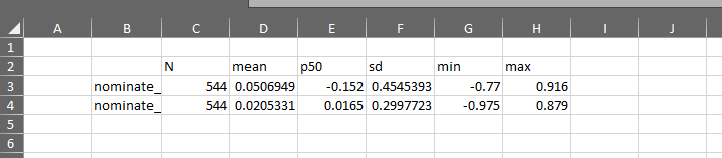